# Importing and Setting Up #

In [6]:
import math as m
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [25]:
%matplotlib inline

sns.set()
tips = sns.load_dataset("tips")

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Plot Experimenting #

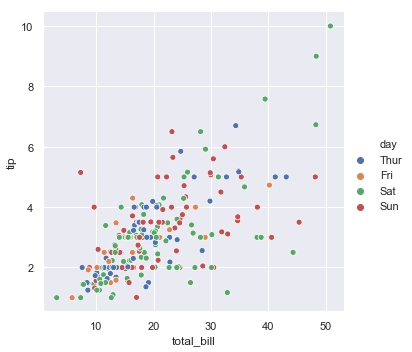

In [2]:
# Relational plot
sns.relplot(x="total_bill", y="tip", hue="day", data=tips, kind="scatter")

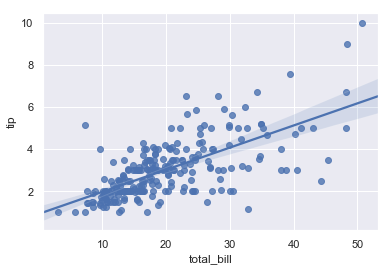

In [3]:
# Regression plot
sns.regplot(x="total_bill", y="tip", data=tips)

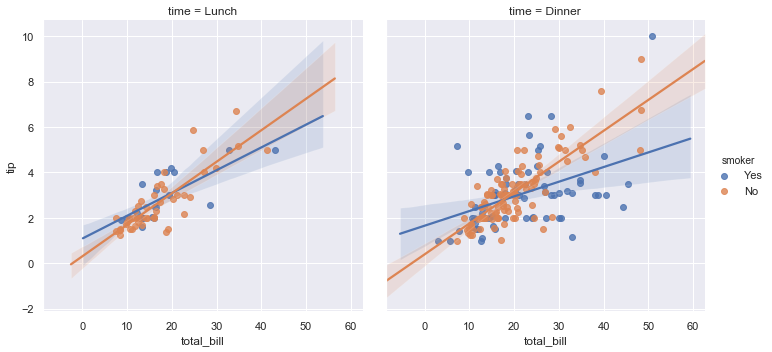

In [4]:
# Linear Model Plot
sns.lmplot(x="total_bill", y="tip", col="time", hue="smoker", data=tips)

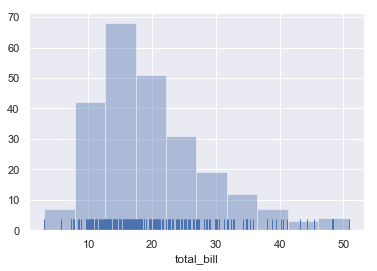

In [5]:
# Histogram 
sns.distplot(tips.total_bill, kde=False, rug=True, bins=10)

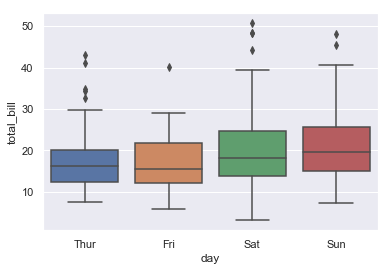

In [7]:
sns.boxplot(x="day", y="total_bill", data=tips)

### Other datasets ###

> *I want to understand how distribution plots work, so I'm going to explore that with different other/random datasets:*

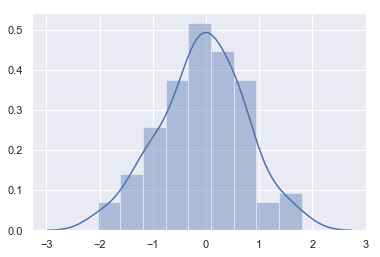

In [8]:
# Normal distribution plot
x = np.random.normal(size=100)
sns.distplot(x)

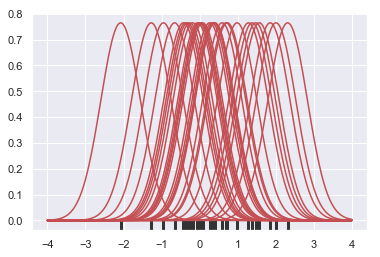

In [11]:
# Creating a bandwith graph
x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.)
support = np.linspace(-4, 4, 200)

kernels = []
for x_i in x:

    kernel = sp.stats.norm(x_i, bandwidth).pdf(support)
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(x, color=".2", linewidth=3);

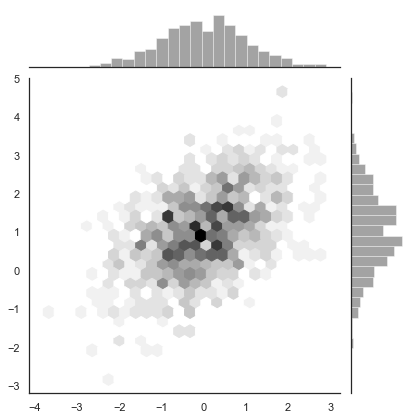

In [26]:
# Making a hex graph of random data
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])

# Creating random dataset, setting mean, then creating a hex dataset. 
# This code was copy and pasted from the official seaborn site.
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

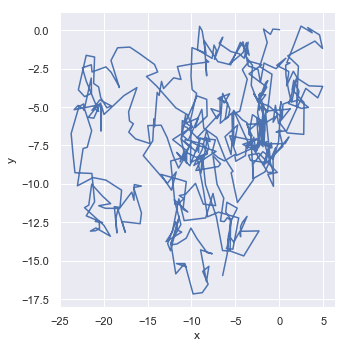

In [32]:
# Random line data
df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=["x", "y"])
sns.relplot(x="x", y="y", sort=False, kind="line", data=df);

# This is sort of a dead-end, as there isn't really a use for this graph in the tips dataset

### Tips Dataset

*You can see that people generally tip more as the bill size increases*

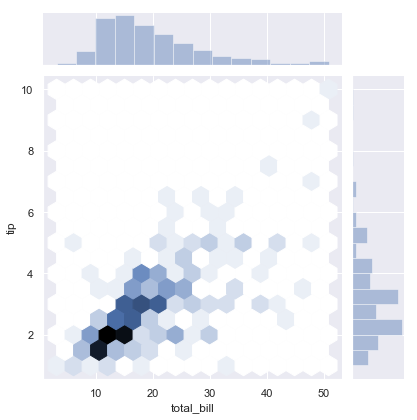

In [28]:
# Hex on the tip dataset
sns.jointplot(x="total_bill", y="tip", kind="hex", data=tips);

# This shows the relationship in a fascinating way

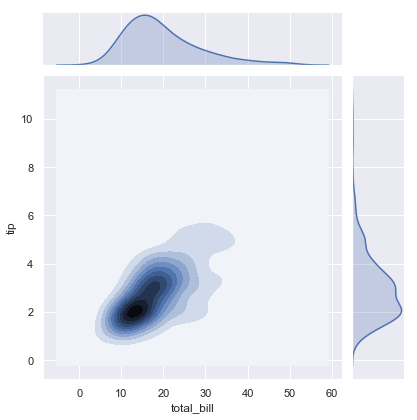

In [34]:
# Terrain-style (kde) graph on the tip dataset
sns.jointplot(x="total_bill", y="tip", kind="kde", data=tips);

# Ultimately, I wanted to explore the tips dataset using many different types of graph

### Iris Dataset ###

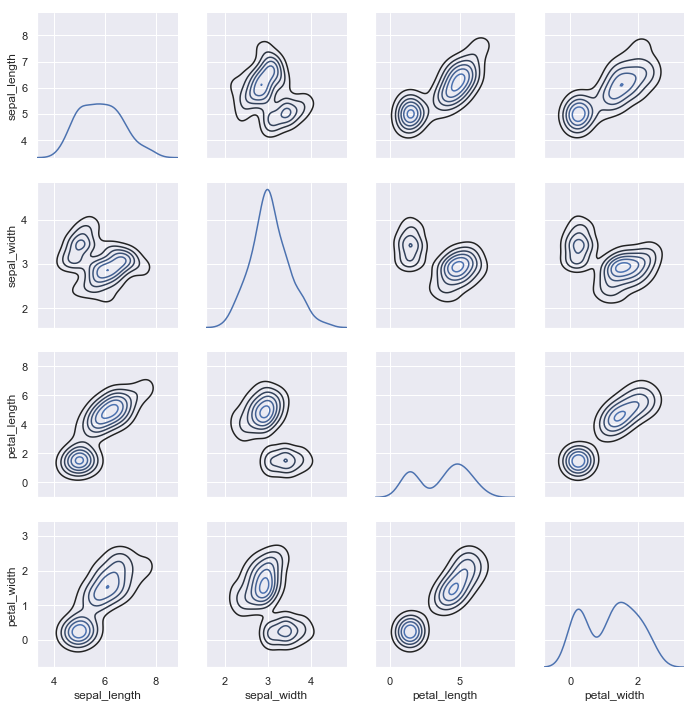

In [33]:
# Loading data
iris = sns.load_dataset("iris")

g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);

# Areas for Further Exploration #

* Learn more about distribution: https://seaborn.pydata.org/tutorial/distributions.html
* Understand seaborn better: https://medium.com/@kbrook10/day-2-ds-how-to-use-seaborn-for-distribution-plots-c3718b07f78e
* Learn more about other types of data: https://seaborn.pydata.org/tutorial/relational.html#emphasizing-continuity-with-line-plots